In [1]:
# Import dependancies
import imageio
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from os import path
from selenium import webdriver
from PIL import Image
from pathlib import Path
print(os.getcwd())

/Users/rogerwatts/Desktop/Classwork/fert_use


In [2]:
fert_df = pd.read_csv("Inputs_FertilizersNutrient_E_All_Data.csv")
fert_df

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1974,1974,tonnes,19117.00,Qm
1,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1975,1975,tonnes,14774.00,Qm
2,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1976,1976,tonnes,26203.00,Qm
3,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1977,1977,tonnes,37689.00,Qm
4,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1978,1978,tonnes,48300.00,Qm
...,...,...,...,...,...,...,...,...,...,...,...
97199,5817,Net Food Importing Developing Countries,3104,Nutrient potash K2O (total),5157,Agricultural Use,2015,2015,tonnes,1327349.45,A
97200,5817,Net Food Importing Developing Countries,3104,Nutrient potash K2O (total),5157,Agricultural Use,2016,2016,tonnes,1279317.58,A
97201,5817,Net Food Importing Developing Countries,3104,Nutrient potash K2O (total),5157,Agricultural Use,2017,2017,tonnes,1478173.59,A
97202,5817,Net Food Importing Developing Countries,3104,Nutrient potash K2O (total),5157,Agricultural Use,2018,2018,tonnes,1618023.97,A


In [3]:
fert_df['Value'].max()


122971695.94

In [4]:
# set the filepath and load in a shapefile
fp = os.path.join("World_Countries", "World_Countries.shp")
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,5,Niue,NU,New Zealand,NZ,0.541413,0.021414,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."


<AxesSubplot:>

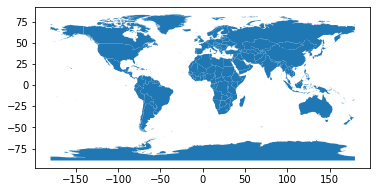

In [5]:
map_df.plot()

In [6]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index("COUNTRY").join(fert_df.set_index("Area"))
merged.head()

,FID,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,Area Code,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,3102.0,Nutrient nitrogen N (total),5510.0,Production,1974.0,1974.0,tonnes,19117.0,Qm
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,3102.0,Nutrient nitrogen N (total),5510.0,Production,1975.0,1975.0,tonnes,14774.0,Qm
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,3102.0,Nutrient nitrogen N (total),5510.0,Production,1976.0,1976.0,tonnes,26203.0,Qm
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,3102.0,Nutrient nitrogen N (total),5510.0,Production,1977.0,1977.0,tonnes,37689.0,Qm
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,3102.0,Nutrient nitrogen N (total),5510.0,Production,1978.0,1978.0,tonnes,48300.0,Qm


In [7]:


# counter for the for loop
i = 0

from datetime import date

start = date(1974, 1, 1) 
end = date(2019, 1, 1)

year_range = [year for year in range(start.year, end.year +1)]
print(year_range)

[1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [8]:
# set the min and max range for the choropleth map
vmin, vmax = 0, 1000000

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


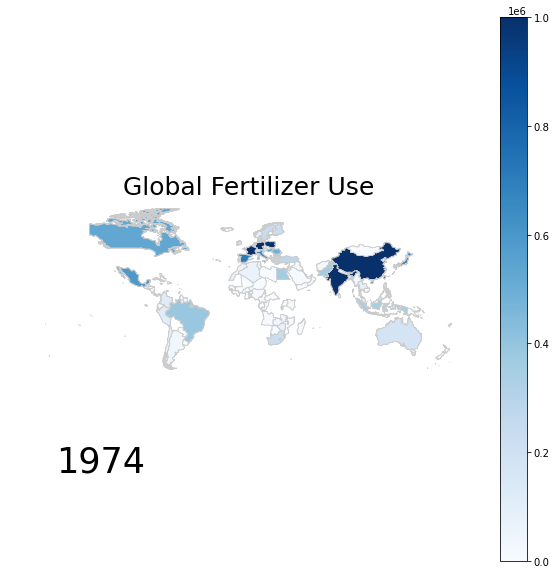

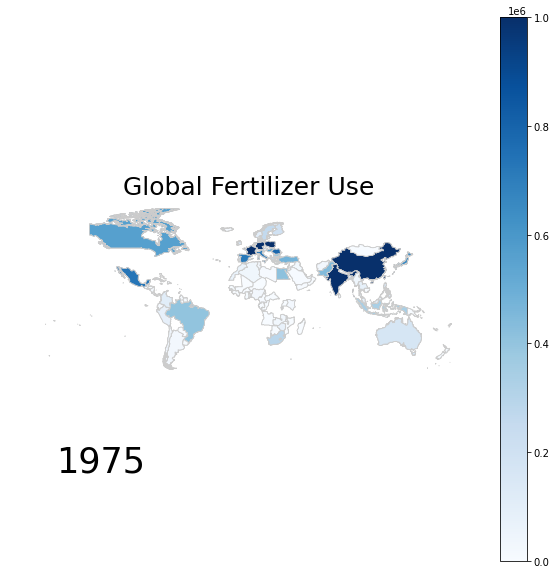

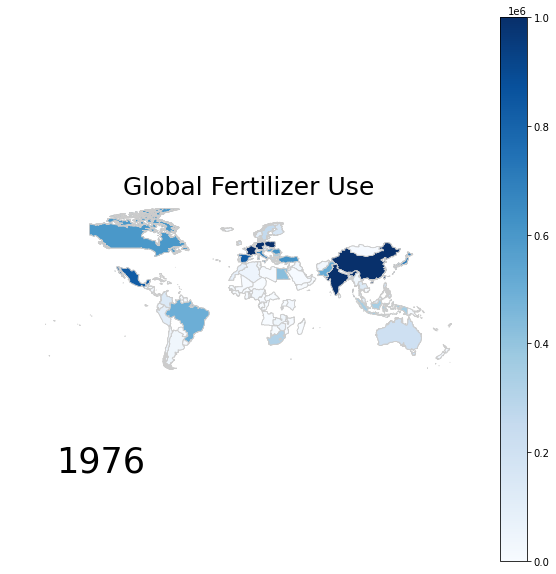

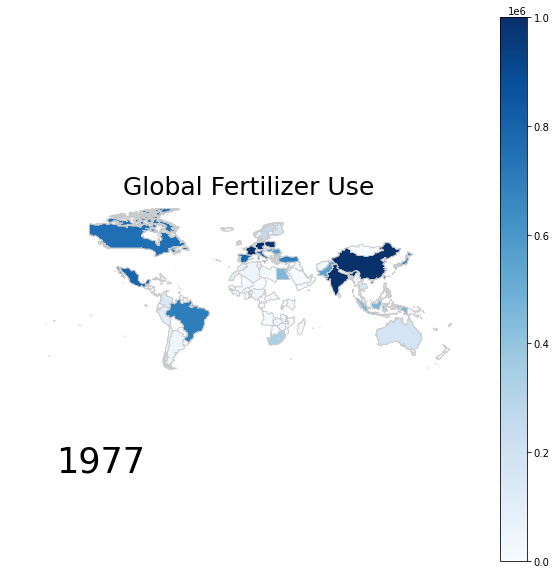

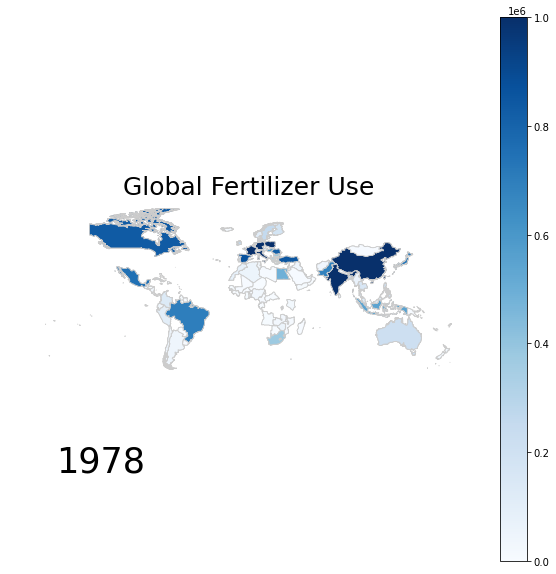

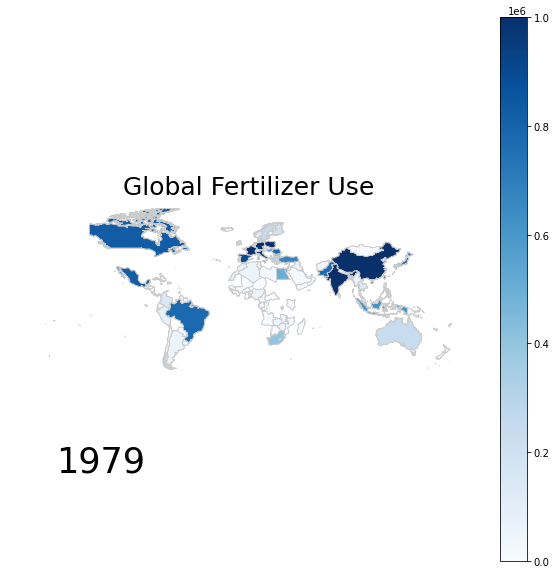

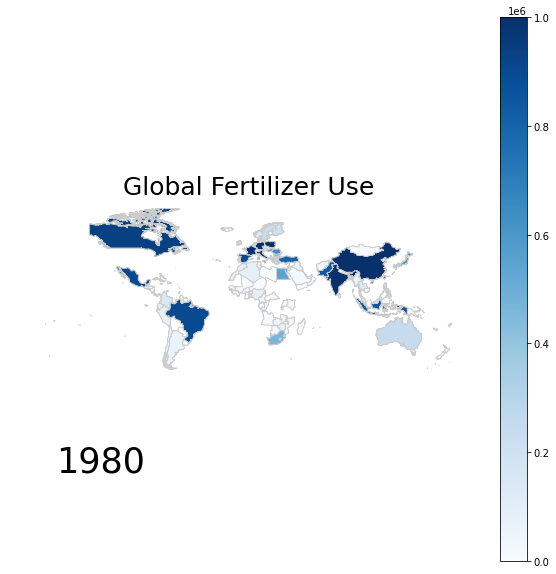

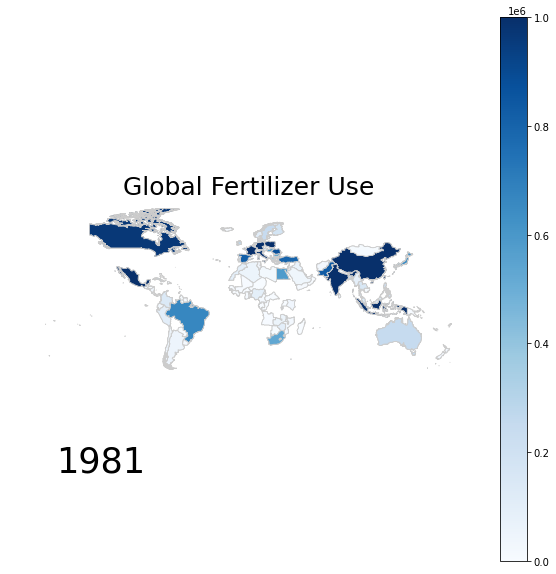

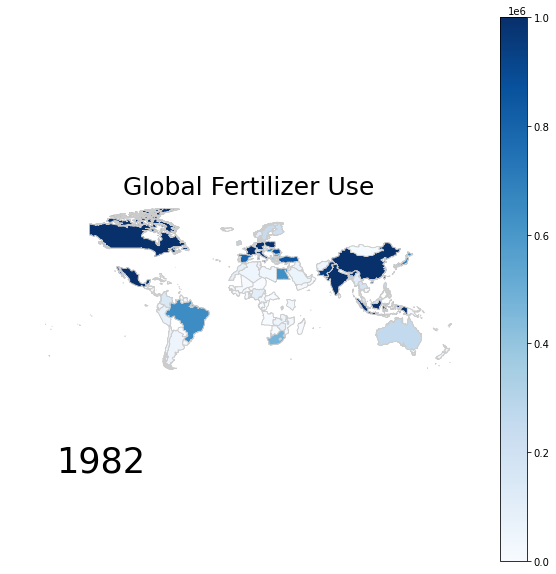

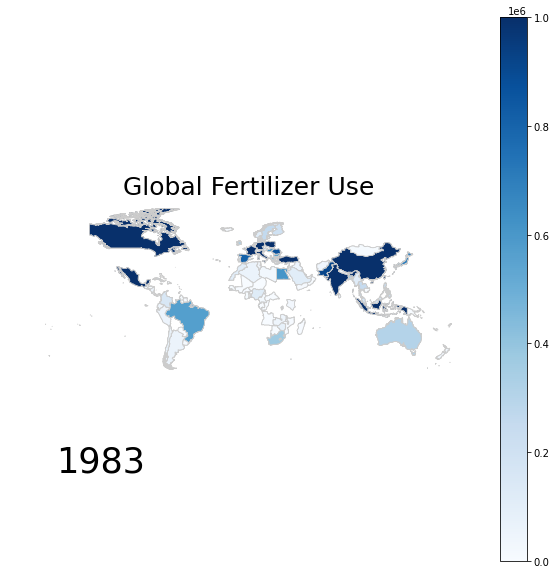

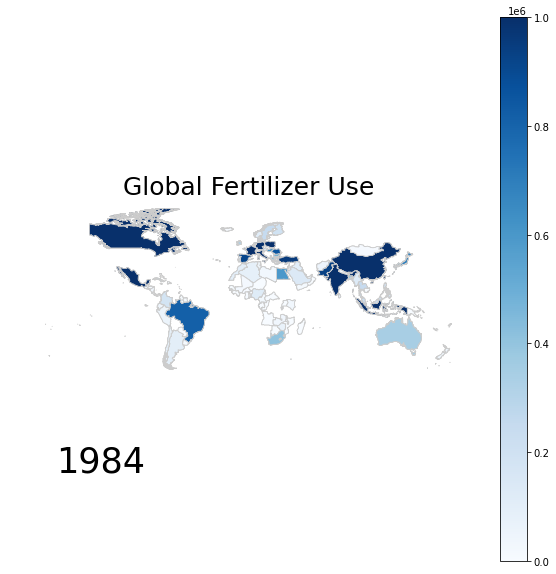

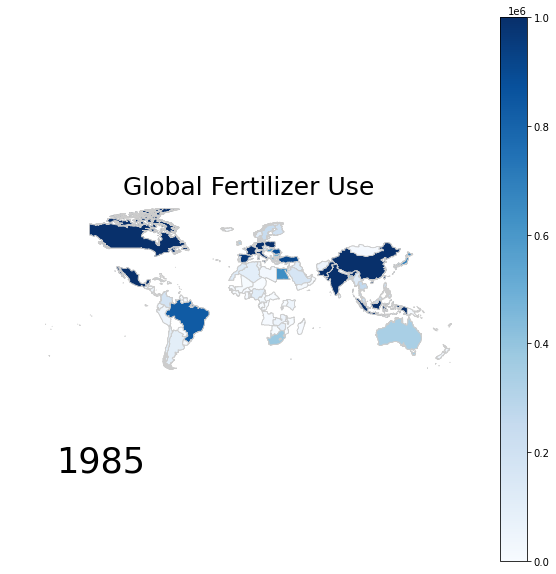

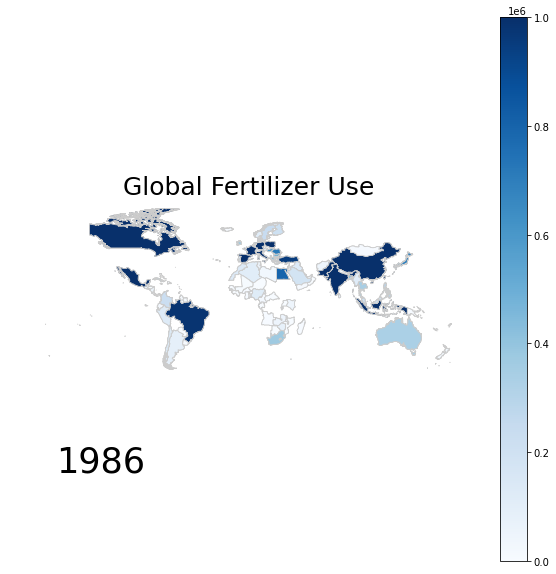

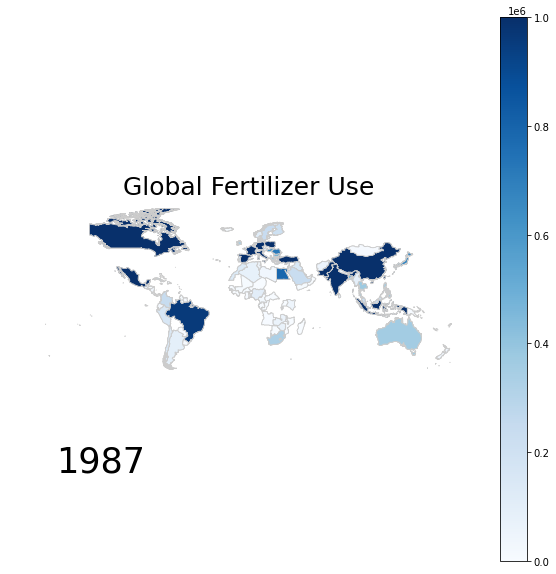

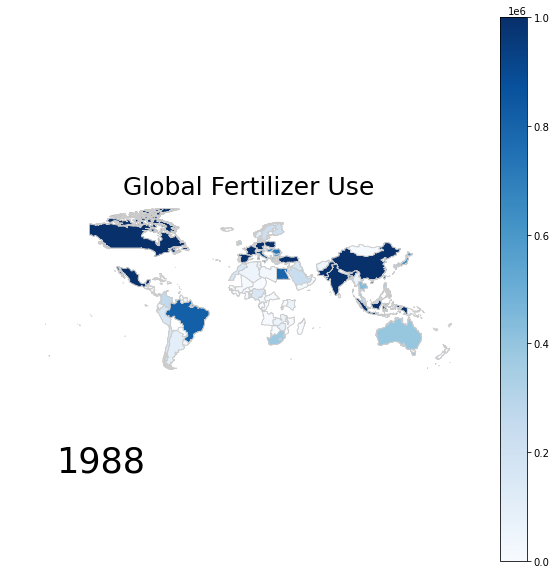

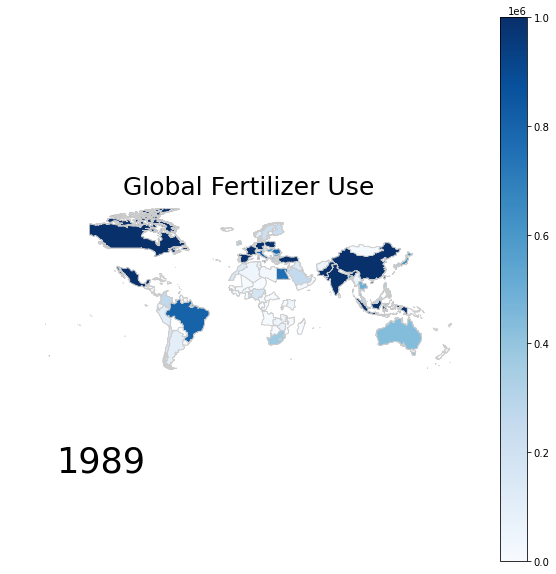

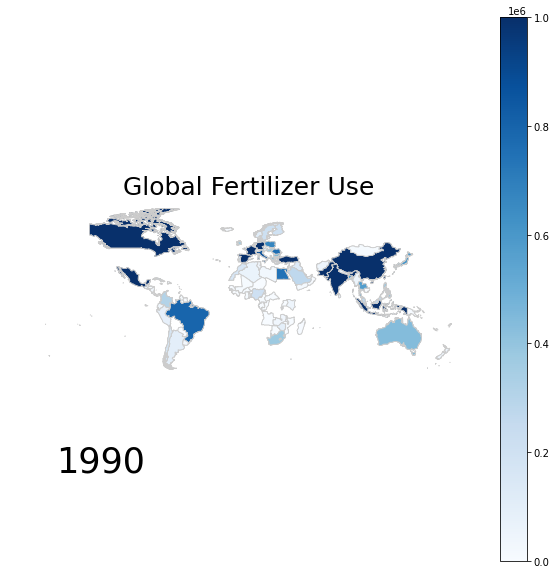

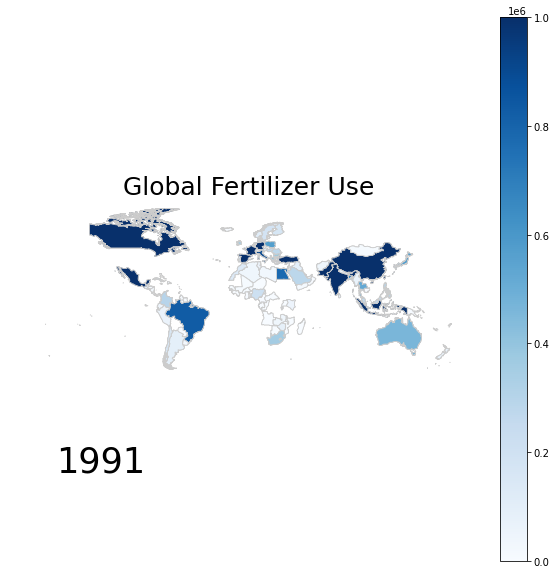

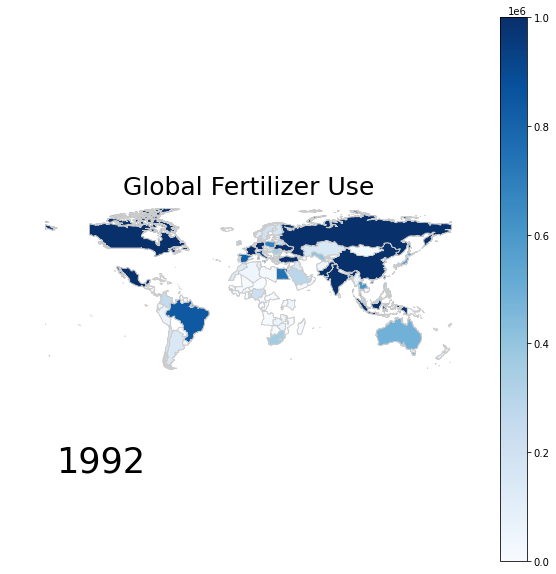

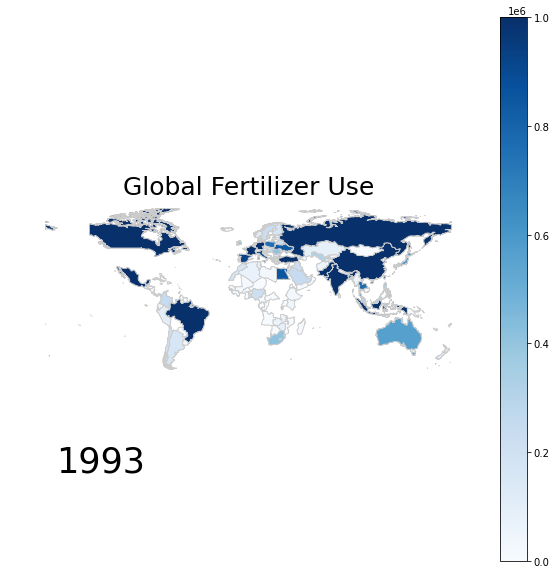

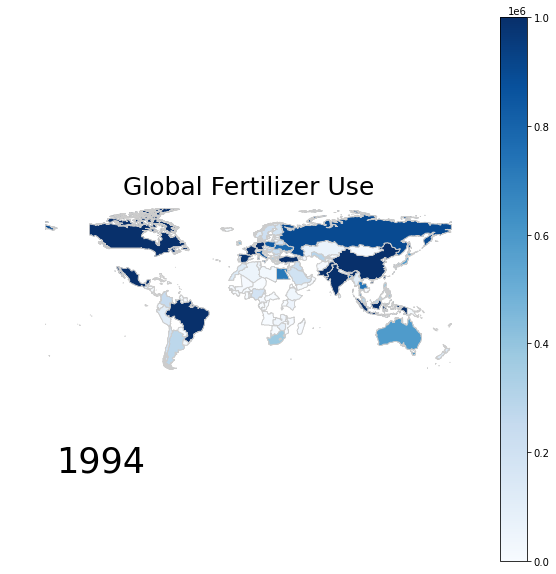

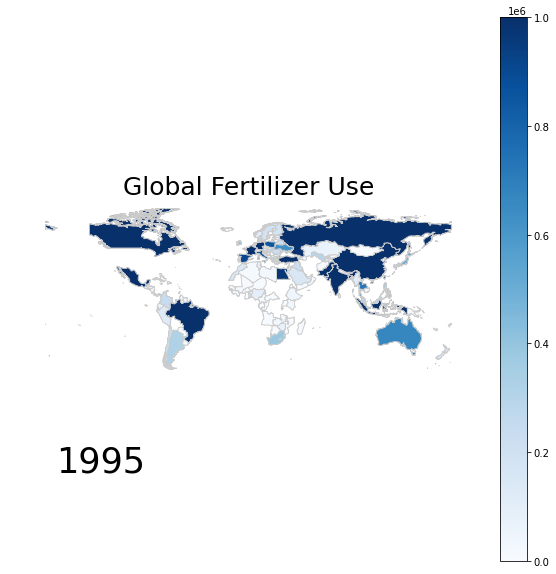

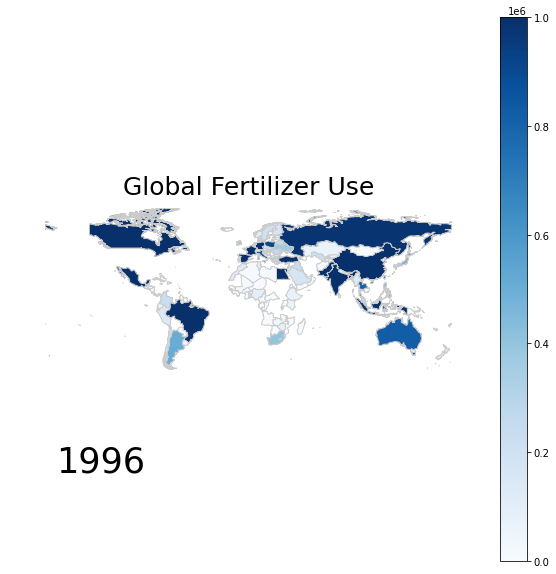

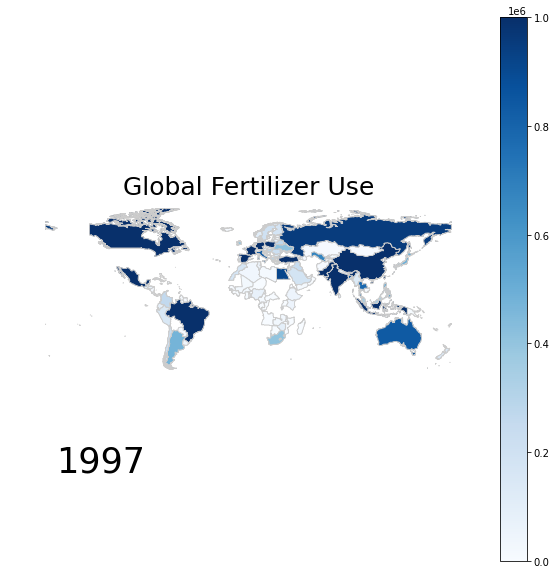

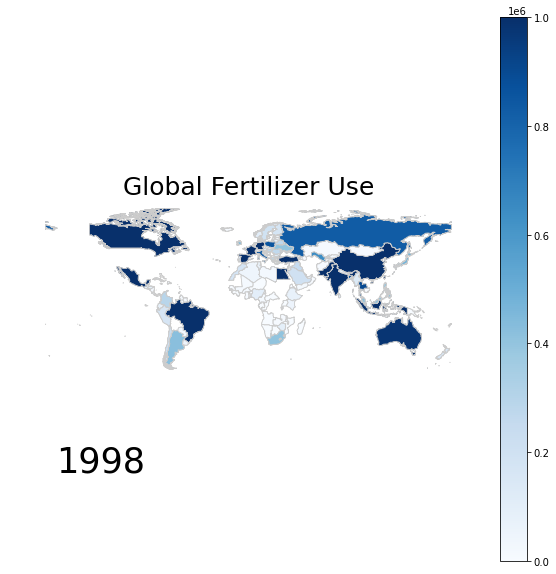

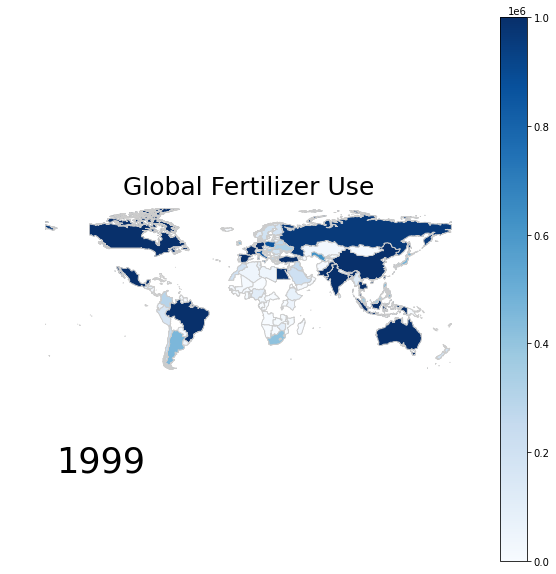

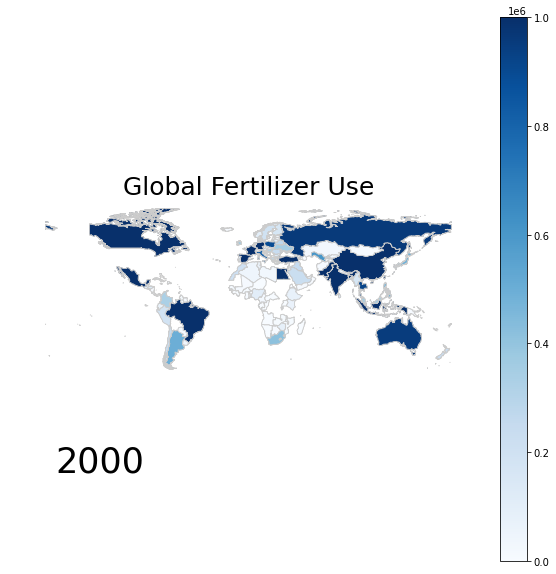

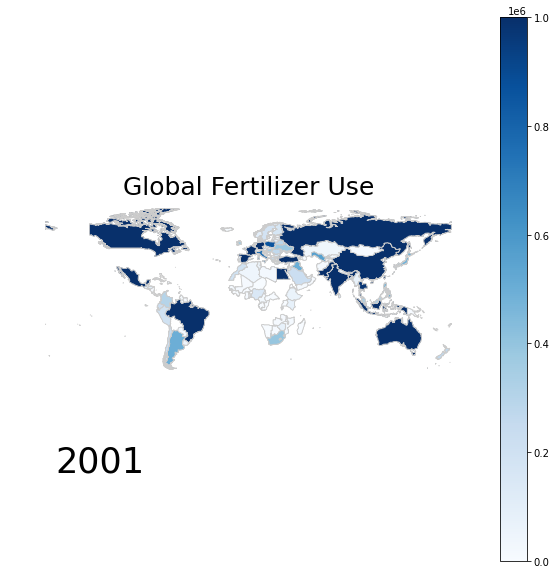

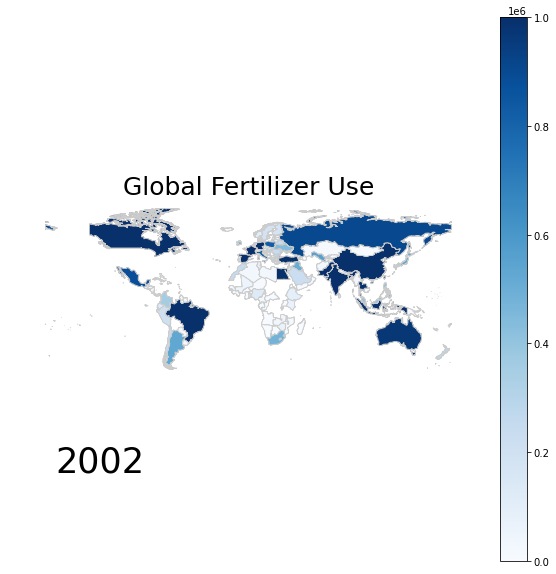

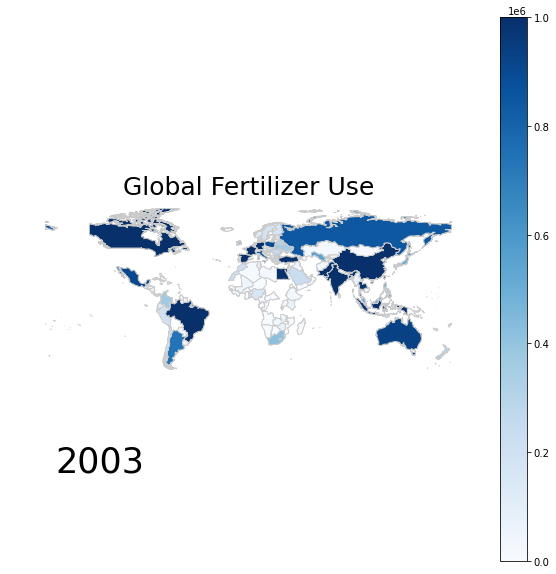

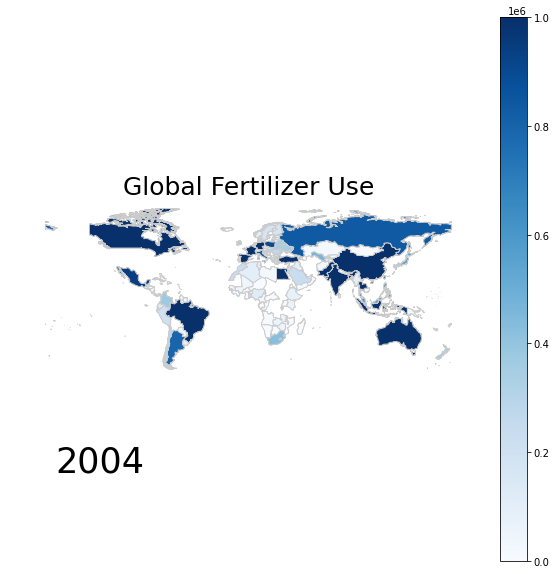

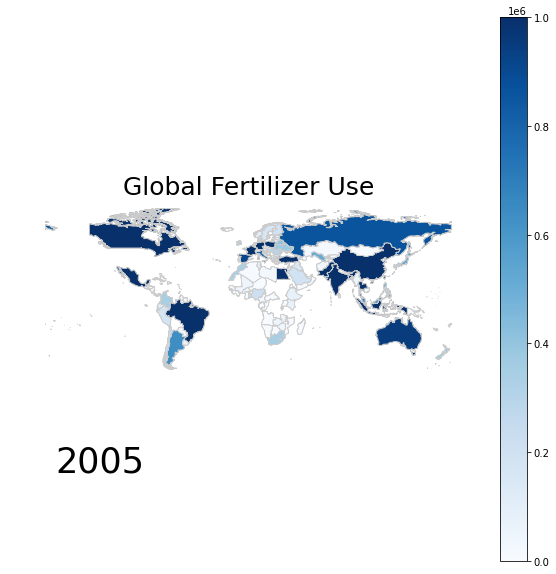

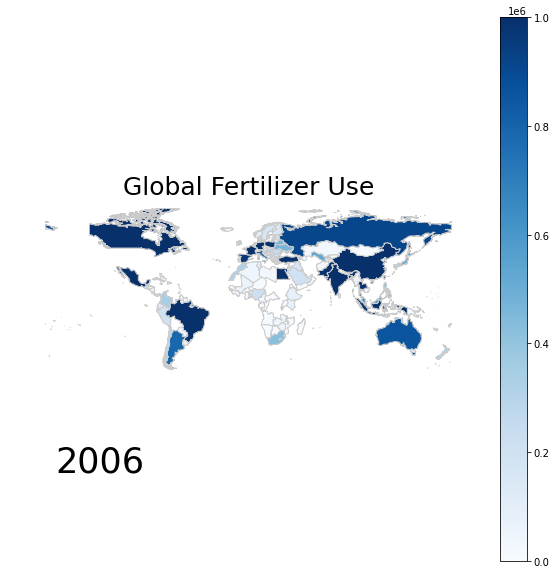

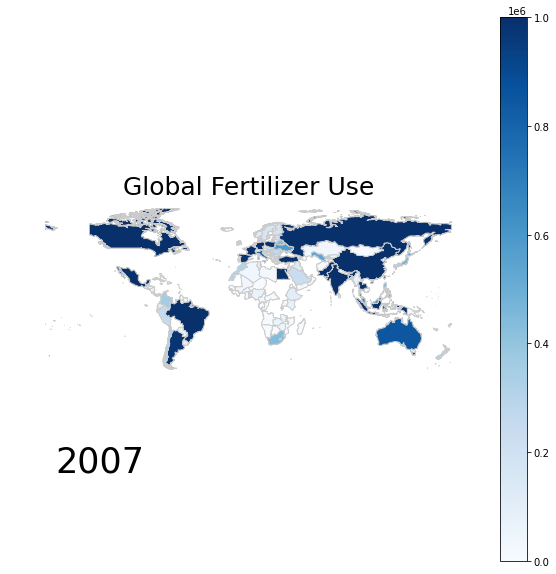

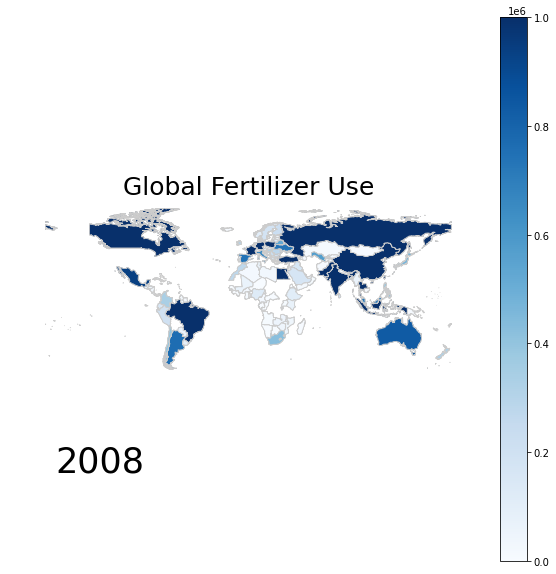

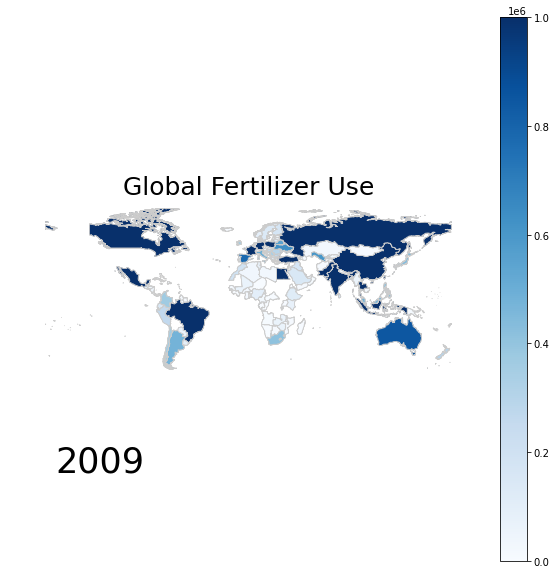

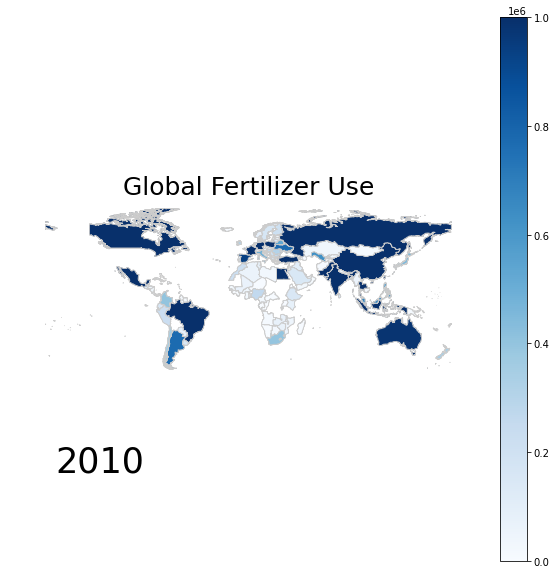

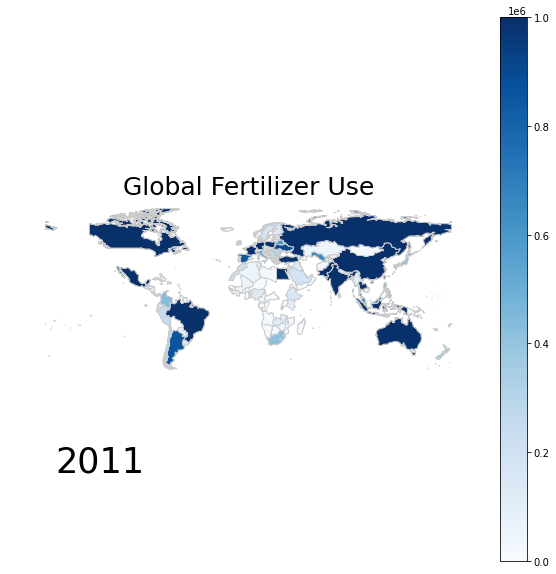

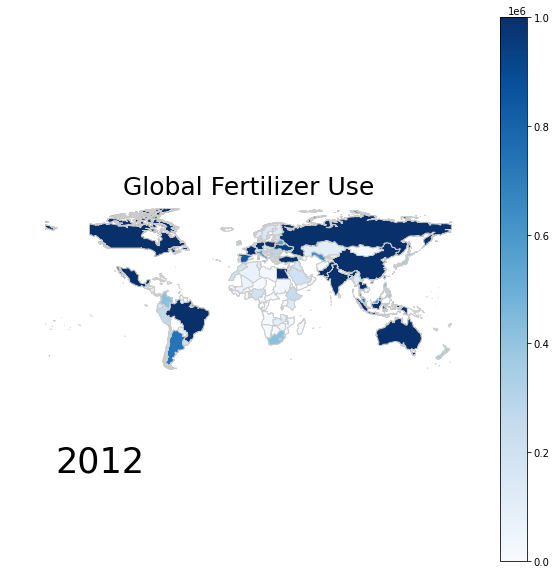

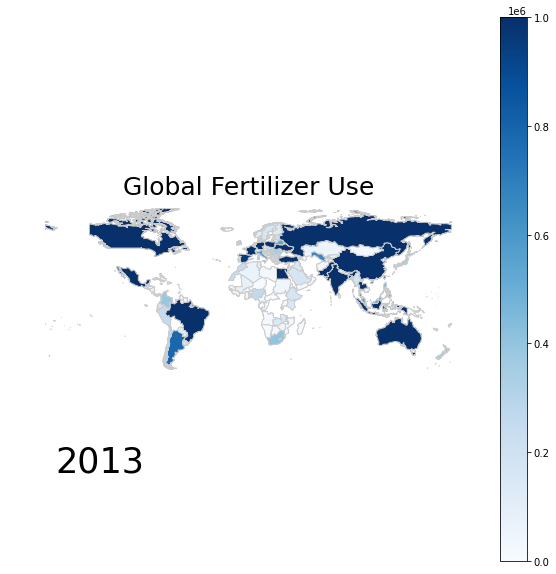

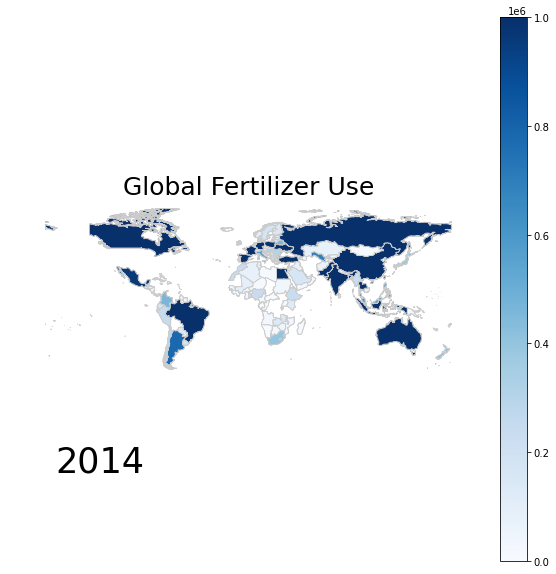

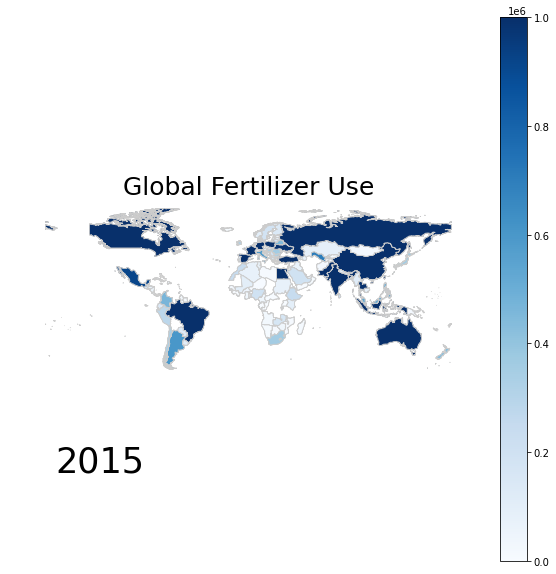

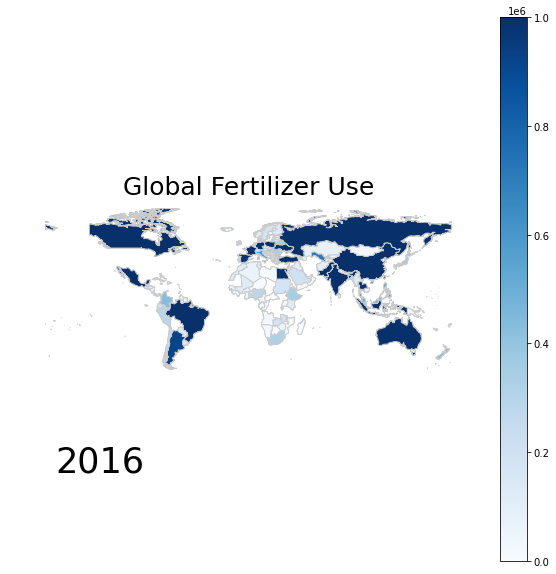

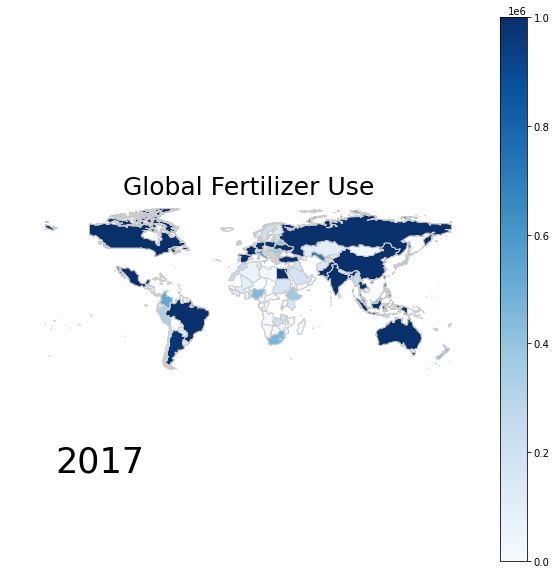

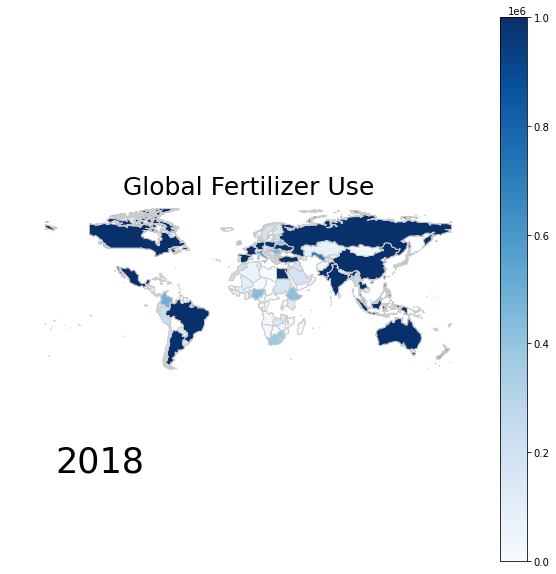

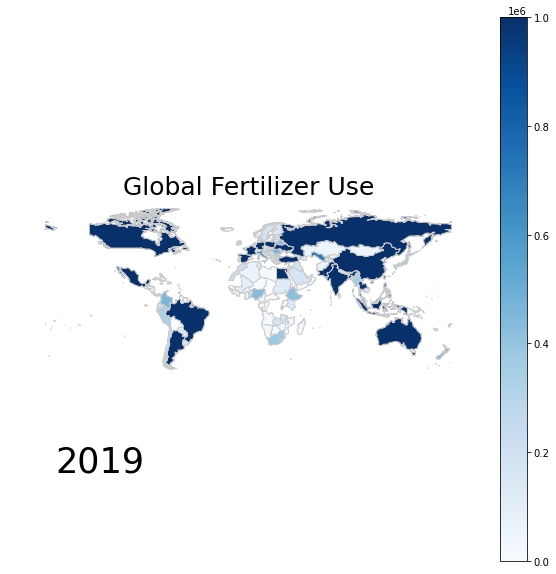

In [9]:
# start the for loop to create one map per year
for year in year_range:
    df_new = merged.loc[((merged['Year'] == year) & (merged["Item Code"] == 3102))]
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = df_new.plot(column='Value', cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Global Fertilizer Use', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # position the annotation to the bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(str(year) + '_fert.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [11]:
# Convert jpg to png files for each map image
for year in year_range:
    im1 = Image.open(str(year) + "_fert.jpg")
    im1.save(str(year) + "_fert.png")

In [12]:
# Create Gif and remove each .png file

png_dir = os.getcwd()
os.listdir(png_dir)

['2015_fert.png',
 '2014_fert.png',
 '2014_fert.jpg',
 '2015_fert.jpg',
 '1995_fert.png',
 '1994_fert.png',
 '1994_fert.jpg',
 '1995_fert.jpg',
 'World_Countries',
 '2003_fert.jpg',
 '2002_fert.jpg',
 '2002_fert.png',
 '2003_fert.png',
 '.DS_Store',
 'Production_Crops_Livestock_E_All_Data_(Normalized).csv',
 '1983_fert.jpg',
 '1982_fert.jpg',
 '1982_fert.png',
 '1983_fert.png',
 'Inputs_LandUse_E_All_Data',
 '2008_fert.png',
 '2009_fert.png',
 '2009_fert.jpg',
 '2008_fert.jpg',
 '1988_fert.png',
 '1989_fert.png',
 '1989_fert.jpg',
 '1988_fert.jpg',
 '2005_fert.png',
 '2004_fert.png',
 'Untitled.ipynb',
 '2004_fert.jpg',
 '2005_fert.jpg',
 '1985_fert.png',
 '1984_fert.png',
 '1984_fert.jpg',
 '1985_fert.jpg',
 '2013_fert.jpg',
 'charts',
 '2012_fert.jpg',
 '1977_fert.png',
 '1976_fert.png',
 '2012_fert.png',
 '2013_fert.png',
 '1976_fert.jpg',
 '1977_fert.jpg',
 '1993_fert.jpg',
 '1992_fert.jpg',
 '1992_fert.png',
 '1993_fert.png',
 'Population_E_All_Data_(Normalized).csv',
 '2018_fert.

In [15]:
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith(".png"):
        file_path = os.path.join(png_dir, file_name)
        print(file_path)
        images.append(imageio.imread(file_path))
imageio.mimsave(r"charts/maps/MapGif.gif", images, fps=1)


/Users/rogerwatts/Desktop/Classwork/fert_use/1974_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1975_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1976_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1977_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1978_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1979_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1980_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1981_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1982_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1983_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1984_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1985_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1986_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1987_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1988_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1989_fert.png
/Users/rogerwatts/Desktop/Classwork/fert_use/1990_fert.p